<a href="https://colab.research.google.com/github/Subin-pds/Supervised_ML_Projects/blob/main/KMeans_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
import pandas as pd

In [9]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
df.drop(['sepal length (cm)','sepal width (cm)'], axis = 'columns', inplace = True)

In [13]:
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


Text(0, 0.5, 'petal width (cm)')

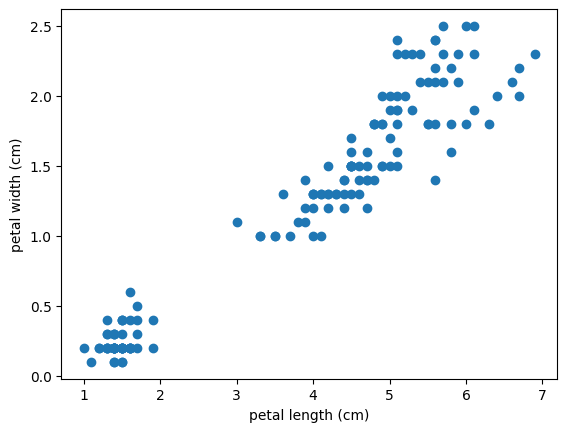

In [15]:
# Let's visualize the plot
from matplotlib import pyplot as plt
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [16]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [18]:
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['prediction'] = y_predicted
df

,petal length (cm),petal width (cm),prediction
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


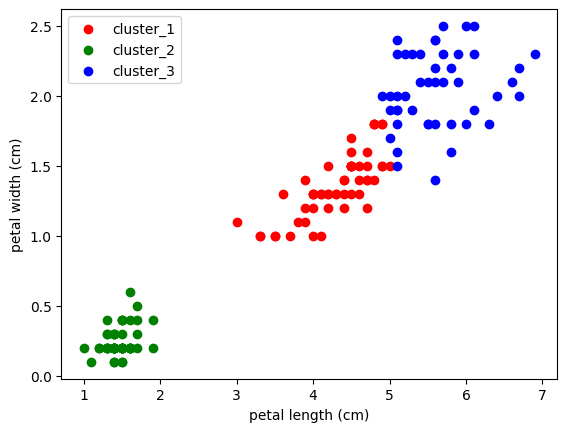

In [22]:
df1 = df[df['prediction']==0]
df2 = df[df['prediction']==1]
df3 = df[df['prediction']==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'red', label='cluster_1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'green', label='cluster_2')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'blue', label='cluster_3')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()


In [21]:
df.prediction.value_counts()

,count
prediction,
0,54
1,50
2,46


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
df

,petal length (cm),petal width (cm),prediction
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


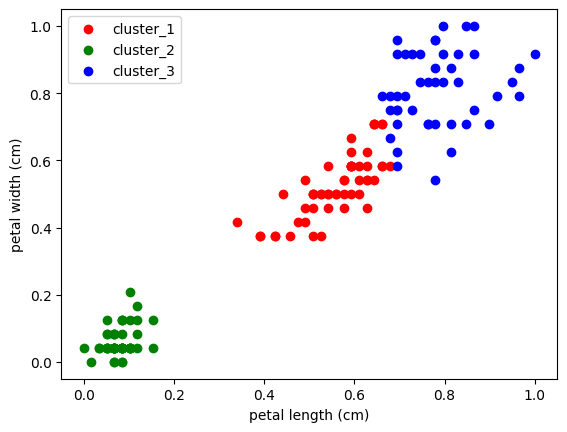

In [26]:
y_prediction = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['prediction'] = y_predicted

df1 = df[df['prediction']==0]
df2 = df[df['prediction']==1]
df3 = df[df['prediction']==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'red', label='cluster_1')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'green', label='cluster_2')
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color = 'blue', label='cluster_3')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()